In [1]:
from __future__ import print_function

import os
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt#, mpld3
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler
from scipy.misc import logsumexp
# Keras
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.metrics import binary_accuracy
from keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten, Input, Lambda, Wrapper, merge, concatenate
from keras.engine import InputSpec
from keras.layers.core import Dense, Dropout, Activation, Layer, Lambda, Flatten
from keras.regularizers import l2
from keras.optimizers import RMSprop, Adadelta, adam
from keras.layers.advanced_activations import LeakyReLU
from keras import initializers
import tensorflow as tf

import random

import sys
sys.path.insert(0, '../code/')
import plan_net

seed = 0 #0
np.random.seed(seed=seed)
random.seed(seed)

%matplotlib inline
# os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="../ab2.json"

Using TensorFlow backend.


# Load data from numpy arrays

In [2]:
def load_data_file(data_file, num_features):
    
    data = np.load(data_file)
    
    if data.ndim == 1:
        data = data[None, :]
    
    x = data[:, :num_features]
    y = data[:, num_features:]
    
    return x, y

In [3]:
num_features = 13
x_data, y_data = load_data_file(data_file='../data/training.npy', num_features=num_features)

* For training, split training data into validation and training

In [4]:
Ntr = 70000
x_data_tr = x_data[:Ntr,:]
y_data_tr = y_data[:Ntr,:]
x_data_val = x_data[Ntr:,:]
y_data_val_un = y_data[Ntr:,:]

# Training / Validation split

## Normalise: remove mean and divide by standard deviation

In [5]:
# Normalise
x_data_tr = (x_data_tr - x_data.mean(0))/x_data.std(0)
x_data_val = (x_data_val - x_data.mean(0))/x_data.std(0)

y_data_tr = (y_data_tr - y_data.mean(0)[:num_features])/y_data.std(0)[:num_features]
y_data_val = (y_data_val_un - y_data.mean(0)[:num_features])/y_data.std(0)[:num_features]


In [6]:
x_data_tr = np.squeeze(x_data_tr)
x_data_val = np.squeeze(x_data_val)
# x_data_te = np.squeeze(x_data_te)

## Setting up the random seed

In [7]:
np.random.seed(seed=seed)
random.seed(seed)

N_ensemble = 5  #Number of networks in ensemble (I suggest sticking with 1)

## Training

In [8]:
# Variables
samples = 20 #number of samples of posterior weight distribution in BNNs
n_iters = 10
epochs = 500
T = 100
batch_size = 512#256
lengthscale = .0001
dropout = 0.138688120021828 #0.17113892846874176 #BO
tau = 3.1047740953274015#2.915523840898378 #BO
layers = [1024,1024,1024,1024] #BO

bnn_list = []
for n in range(N_ensemble):
    np.random.seed(seed=n)
    random.seed(n)
    bnn = plan_net.BNNModel_het_chol(x_data_tr, y_data_tr, layers , dropout = dropout,
                            T=T , tau = tau, lengthscale = lengthscale, ens_num=n)
    bnn.train(epochs = epochs, batch_size = batch_size, validation_data = (x_data_val,y_data_val))
    bnn_list.append(bnn)

Train on 70000 samples, validate on 9999 samples
Epoch 1/500
 - 3s - loss: 0.2739 - val_loss: -1.8269e+00
Epoch 2/500
 - 1s - loss: -2.7756e+00 - val_loss: -3.5523e+00
Epoch 3/500
 - 1s - loss: -3.8361e+00 - val_loss: -4.5623e+00
Epoch 4/500
 - 1s - loss: -4.7420e+00 - val_loss: -5.3669e+00
Epoch 5/500
 - 2s - loss: -5.3509e+00 - val_loss: -5.0776e+00
Epoch 6/500
 - 1s - loss: -4.8235e+00 - val_loss: -5.7294e+00
Epoch 7/500
 - 2s - loss: -5.6451e+00 - val_loss: -5.9745e+00
Epoch 8/500
 - 1s - loss: -6.0816e+00 - val_loss: -6.0897e+00
Epoch 9/500
 - 1s - loss: -5.7442e+00 - val_loss: -6.0825e+00
Epoch 10/500
 - 2s - loss: -5.7096e+00 - val_loss: -6.5460e+00
Epoch 11/500
 - 2s - loss: -6.6916e+00 - val_loss: -5.9783e+00
Epoch 12/500
 - 1s - loss: -5.5419e+00 - val_loss: -5.4391e+00
Epoch 13/500
 - 1s - loss: -5.9964e+00 - val_loss: -6.5838e+00
Epoch 14/500
 - 2s - loss: -6.5372e+00 - val_loss: -6.5375e+00
Epoch 15/500
 - 1s - loss: -6.9100e+00 - val_loss: -7.7376e+00
Epoch 16/500
 - 2s -

 - 1s - loss: -9.5620e+00 - val_loss: -8.8185e+00
Epoch 131/500
 - 1s - loss: -9.8282e+00 - val_loss: -8.6843e+00
Epoch 132/500
 - 1s - loss: -9.6812e+00 - val_loss: -9.6682e+00
Epoch 133/500
 - 1s - loss: -1.0025e+01 - val_loss: -9.8869e+00
Epoch 134/500
 - 1s - loss: -1.0161e+01 - val_loss: -1.0269e+01
Epoch 135/500
 - 2s - loss: -9.9943e+00 - val_loss: -1.0238e+01
Epoch 136/500
 - 1s - loss: -9.5648e+00 - val_loss: -9.3409e+00
Epoch 137/500
 - 1s - loss: -1.0095e+01 - val_loss: -8.7973e+00
Epoch 138/500
 - 2s - loss: -9.7958e+00 - val_loss: -9.4299e+00
Epoch 139/500
 - 1s - loss: -9.6362e+00 - val_loss: -8.0902e+00
Epoch 140/500
 - 1s - loss: -7.6908e+00 - val_loss: -6.9559e+00
Epoch 141/500
 - 2s - loss: -9.0323e+00 - val_loss: -8.7275e+00
Epoch 142/500
 - 1s - loss: -9.8037e+00 - val_loss: -9.6774e+00
Epoch 143/500
 - 1s - loss: -9.9375e+00 - val_loss: -9.8999e+00
Epoch 144/500
 - 1s - loss: -1.0163e+01 - val_loss: -9.0639e+00
Epoch 145/500
 - 1s - loss: -1.0280e+01 - val_loss: -9

Epoch 110/500
 - 2s - loss: -8.3145e+00 - val_loss: -9.4028e+00
Epoch 111/500
 - 1s - loss: -6.5610e+00 - val_loss: -8.4776e+00
Epoch 112/500
 - 2s - loss: -8.4059e+00 - val_loss: -8.2400e+00
Epoch 113/500
 - 2s - loss: -9.0661e+00 - val_loss: -8.6997e+00
Epoch 114/500
 - 1s - loss: -9.5385e+00 - val_loss: -9.6632e+00
Epoch 115/500
 - 2s - loss: -9.1971e+00 - val_loss: -9.5863e+00
Epoch 116/500
 - 2s - loss: -9.7602e+00 - val_loss: -9.5458e+00
Epoch 117/500
 - 2s - loss: -9.0474e+00 - val_loss: -9.5386e+00
Epoch 118/500
 - 1s - loss: -8.7878e+00 - val_loss: -8.4231e+00
Epoch 119/500
 - 1s - loss: -9.4364e+00 - val_loss: -9.4140e+00
Epoch 120/500
 - 1s - loss: -9.0386e+00 - val_loss: -8.7493e+00
Epoch 121/500
 - 1s - loss: -8.9526e+00 - val_loss: -8.8398e+00
Epoch 122/500
 - 2s - loss: -9.6020e+00 - val_loss: -5.6844e+00
Epoch 123/500
 - 2s - loss: -8.3690e+00 - val_loss: -7.9527e+00
Epoch 124/500
 - 1s - loss: -9.4392e+00 - val_loss: -9.8038e+00
Epoch 125/500
 - 1s - loss: -9.6773e+00 

Epoch 40/500
 - 2s - loss: -8.3151e+00 - val_loss: -5.8172e+00
Epoch 41/500
 - 1s - loss: -7.7311e+00 - val_loss: -8.7708e+00
Epoch 42/500
 - 2s - loss: -8.8080e+00 - val_loss: -9.3315e+00
Epoch 43/500
 - 2s - loss: -8.5609e+00 - val_loss: -8.7861e+00
Epoch 44/500
 - 1s - loss: -7.4448e+00 - val_loss: -8.3700e+00
Epoch 45/500
 - 2s - loss: -8.2589e+00 - val_loss: -8.9067e+00
Epoch 46/500
 - 1s - loss: -7.4137e+00 - val_loss: -7.0756e+00
Epoch 47/500
 - 1s - loss: -8.6850e+00 - val_loss: -9.2426e+00
Epoch 48/500
 - 1s - loss: -7.7954e+00 - val_loss: -8.1679e+00
Epoch 49/500
 - 2s - loss: -8.3455e+00 - val_loss: -7.3636e+00
Epoch 50/500
 - 1s - loss: -7.4300e+00 - val_loss: -8.5324e+00
Epoch 51/500
 - 2s - loss: -8.4867e+00 - val_loss: -8.2253e+00
Epoch 52/500
 - 1s - loss: -8.7386e+00 - val_loss: -9.1259e+00
Epoch 53/500
 - 2s - loss: -8.9995e+00 - val_loss: -6.1761e+00
Epoch 54/500
 - 1s - loss: -6.3641e+00 - val_loss: -7.9201e+00
Epoch 55/500
 - 2s - loss: -8.6531e+00 - val_loss: -9.2

Epoch 169/500
 - 2s - loss: -1.0058e+01 - val_loss: -9.0842e+00
Epoch 170/500
 - 2s - loss: -1.0472e+01 - val_loss: -1.0241e+01
Epoch 171/500
 - 1s - loss: -1.0383e+01 - val_loss: -9.2472e+00
Epoch 172/500
 - 1s - loss: -1.0485e+01 - val_loss: -7.6907e+00
Epoch 173/500
 - 1s - loss: -9.8920e+00 - val_loss: -1.0229e+01
Epoch 174/500
 - 1s - loss: -9.6618e+00 - val_loss: -7.1759e+00
Epoch 175/500
 - 2s - loss: -9.0967e+00 - val_loss: -9.8191e+00
Epoch 176/500
 - 1s - loss: -9.7697e+00 - val_loss: -1.0400e+01
Epoch 177/500
 - 1s - loss: -1.0200e+01 - val_loss: -1.0255e+01
Epoch 178/500
 - 1s - loss: -8.5126e+00 - val_loss: -9.4990e+00
Epoch 179/500
 - 1s - loss: -1.0321e+01 - val_loss: -9.6747e+00
Epoch 180/500
 - 1s - loss: -1.0069e+01 - val_loss: -1.0063e+01
Epoch 181/500
 - 1s - loss: -7.5325e+00 - val_loss: -8.7491e+00
Epoch 182/500
 - 1s - loss: -9.3433e+00 - val_loss: -9.3027e+00
Epoch 183/500
 - 1s - loss: -9.6295e+00 - val_loss: -8.0437e+00
Epoch 184/500
 - 1s - loss: -9.7927e+00 

Epoch 106/500
 - 1s - loss: -8.6200e+00 - val_loss: -8.0205e+00
Epoch 107/500
 - 2s - loss: -9.8673e+00 - val_loss: -1.0094e+01
Epoch 108/500
 - 2s - loss: -7.6868e+00 - val_loss: -6.4969e+00
Epoch 109/500
 - 1s - loss: -7.6829e+00 - val_loss: -8.7665e+00
Epoch 110/500
 - 1s - loss: -7.8758e+00 - val_loss: -7.7385e+00
Epoch 111/500
 - 2s - loss: -8.4306e+00 - val_loss: -8.6614e+00
Epoch 112/500
 - 1s - loss: -9.2127e+00 - val_loss: -8.5617e+00
Epoch 113/500
 - 1s - loss: -9.4027e+00 - val_loss: -9.5421e+00
Epoch 114/500
 - 1s - loss: -9.8583e+00 - val_loss: -1.0011e+01
Epoch 115/500
 - 2s - loss: -9.9662e+00 - val_loss: -9.6991e+00
Epoch 116/500
 - 2s - loss: -9.0495e+00 - val_loss: -6.5223e+00
Epoch 117/500
 - 2s - loss: -9.3151e+00 - val_loss: -8.9345e+00
Epoch 118/500
 - 1s - loss: -9.7135e+00 - val_loss: -9.5089e+00
Epoch 119/500
 - 1s - loss: -1.0208e+01 - val_loss: -1.0004e+01
Epoch 120/500
 - 1s - loss: -1.0289e+01 - val_loss: -1.0276e+01
Epoch 121/500
 - 1s - loss: -1.0278e+01 

 - 1s - loss: -9.8536e+00 - val_loss: -8.9792e+00
Epoch 235/500
 - 1s - loss: -1.0087e+01 - val_loss: -7.8921e+00
Epoch 236/500
 - 1s - loss: -1.0367e+01 - val_loss: -9.1177e+00
Epoch 237/500
 - 2s - loss: -9.4455e+00 - val_loss: -9.4151e+00
Epoch 00237: early stopping
Train on 70000 samples, validate on 9999 samples
Epoch 1/500
 - 2s - loss: 0.4082 - val_loss: -1.6088e+00
Epoch 2/500
 - 1s - loss: -2.8260e+00 - val_loss: -3.4300e+00
Epoch 3/500
 - 1s - loss: -4.0583e+00 - val_loss: -4.5504e+00
Epoch 4/500
 - 1s - loss: -4.7037e+00 - val_loss: -5.2552e+00
Epoch 5/500
 - 1s - loss: -5.0332e+00 - val_loss: -6.0366e+00
Epoch 6/500
 - 1s - loss: -4.3033e+00 - val_loss: -4.6656e+00
Epoch 7/500
 - 2s - loss: -4.5648e+00 - val_loss: -5.6441e+00
Epoch 8/500
 - 1s - loss: -5.7725e+00 - val_loss: -6.2135e+00
Epoch 9/500
 - 2s - loss: -5.6266e+00 - val_loss: -5.4409e+00
Epoch 10/500
 - 1s - loss: -6.2492e+00 - val_loss: -6.4209e+00
Epoch 11/500
 - 1s - loss: -6.7019e+00 - val_loss: -5.7278e+00
Ep

Epoch 126/500
 - 1s - loss: -9.2011e+00 - val_loss: -6.7358e+00
Epoch 127/500
 - 2s - loss: -9.2191e+00 - val_loss: -9.8183e+00
Epoch 128/500
 - 1s - loss: -9.0746e+00 - val_loss: -9.5984e+00
Epoch 129/500
 - 1s - loss: -8.8793e+00 - val_loss: -7.3642e+00
Epoch 130/500
 - 1s - loss: -8.0661e+00 - val_loss: -8.4343e+00
Epoch 131/500
 - 2s - loss: -8.6815e+00 - val_loss: -7.1268e+00
Epoch 132/500
 - 2s - loss: -9.2228e+00 - val_loss: -9.7414e+00
Epoch 133/500
 - 2s - loss: -1.0273e+01 - val_loss: -1.0310e+01
Epoch 134/500
 - 2s - loss: -9.6477e+00 - val_loss: -1.0292e+01
Epoch 135/500
 - 1s - loss: -9.6813e+00 - val_loss: -9.4030e+00
Epoch 136/500
 - 2s - loss: -1.0540e+01 - val_loss: -1.0038e+01
Epoch 137/500
 - 1s - loss: -4.9153e+00 - val_loss: -8.6855e+00
Epoch 138/500
 - 1s - loss: -9.5132e+00 - val_loss: -8.6959e+00
Epoch 139/500
 - 2s - loss: -9.5395e+00 - val_loss: -9.5612e+00
Epoch 140/500
 - 2s - loss: -9.5905e+00 - val_loss: -9.5724e+00
Epoch 141/500
 - 1s - loss: -9.8092e+00 

### Validation

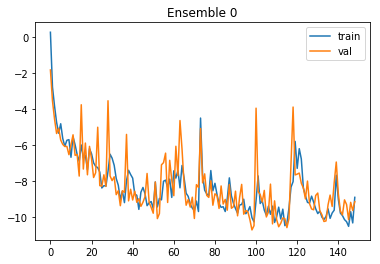

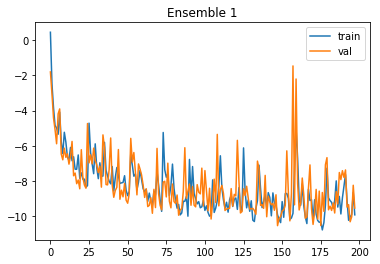

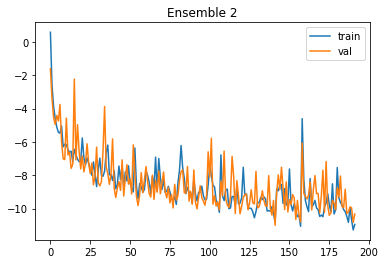

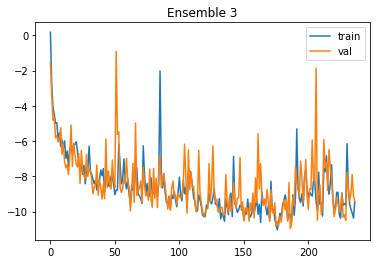

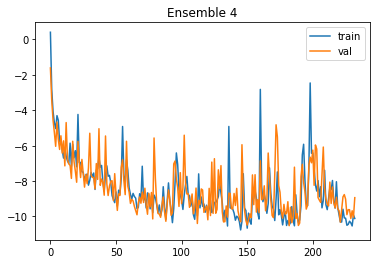

In [9]:
n = 0
for bnn in bnn_list:
    plt.figure()
    plt.title('Ensemble ' +str(n))
    plt.plot(bnn.historyBNN.history['loss'],label='train')
    plt.plot(bnn.historyBNN.history['val_loss'],label='val')
    plt.legend()
#     plt.savefig('./ens_folder/ensemble'+str(n)+'_train_val.pdf')
    plt.show()
    n+=1

In [10]:
D = y_data.shape[1]

In [11]:

rmse_list = []
for n in range(N_ensemble):
    weights_file_std = './ens_folder_models/ensemble_'+str(n)+'_check_point_weights_het_loss.h5'
    bnn.model.load_weights(weights_file_std)
    preds = np.mean([bnn.model.predict([x_data_val]) for _ in range(20)], 0)[:, :D]
    preds_denorm = preds * y_data.std(0) + y_data.mean(0)
    y_data_val_denorm = y_data_val * y_data.std(0) + y_data.mean(0)
    print(preds_denorm.shape)
    rmse = np.mean((preds_denorm - y_data_val_denorm)**2., 0)**0.5
    print(rmse)
    rmse_list.append(rmse)


(9999, 5)
[338.50767449   2.26814147   2.69184329   2.0844472    2.16761793]
(9999, 5)
[340.14644091   2.29090474   2.70056423   2.1012496    2.18312438]
(9999, 5)
[335.60292005   2.27043651   2.69532076   2.08595796   2.15891652]
(9999, 5)
[336.36959789   2.28157634   2.69292872   2.09282322   2.16247906]
(9999, 5)
[338.97725304   2.29141098   2.69644407   2.1049754    2.17198049]


In [12]:
np.mean(rmse_list,0)

array([337.92077728,   2.28049401,   2.69542021,   2.09389068,
         2.16882368])